# Week 1
## Representational Learning using Autoencoders

### 1.Use the FashionMNIST data set and train a basic autoencoder to reconstruct images.

Train the  model  using  x_train  as both the  input and the  target.  The  encoder shouldlearn  to  compress  the  dataset  from  784  dimensions  to  the  latent  space,  and  the decoder should learn to reconstruct the original images.
Let the autoencoder have two Dense layers: 
- an encoder, which compresses the images into a 64 dimensional latent vector, use reLU as activation function.
- a decoder, that reconstructs the original image from the latent space, use sigmoid as activation function.

Once the model is trained for atleast 10 epochs, with loss function as mean square error, test it by encoding and decoding images from the test set. Display original andreconstructed images.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Reshape, Input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import fashion mnist since its inbuilt in tensorflow

(60000, 28, 28)
(10000, 28, 28)


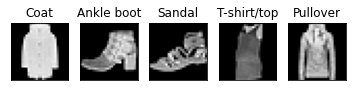

In [12]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Prepare label dict for labelling in viz
labels_dict = {
    '0': 'T-shirt/top',
    '1': 'Trouser',
    '2': 'Pullover',
    '3': 'Dress',
    '4': 'Coat',
    '5': 'Sandal',
    '6': 'Shirt',
    '7': 'Sneaker',
    '8': 'Bag',
    '9': 'Ankle boot'
}
# Normalize images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Check the shapes of data
print (x_train.shape)
print (x_test.shape)

# Display 5 original images
n = 5
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(x_test[select_img_index])
    plt.title(labels_dict[str(y_test[select_img_index])])
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Encoder compresses the image into 64-dim latent space

In [13]:
latent_dim = 64
def build_autoencoder(latent_dim):
  # Encoder Network
  encoder = tf.keras.Sequential()
  encoder.add(Flatten())
  encoder.add(Dense(latent_dim, activation='relu'))
  # Decoder Network
  decoder = tf.keras.Sequential()
  decoder.add(Dense(784, activation='sigmoid'))
  decoder.add(Reshape((28, 28)))
  return encoder,decoder

# Get encoder and Decoder
encoder, decoder = build_autoencoder(latent_dim)
# Use Functional API to link them together
inp = Input((28,28))
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = tf.keras.Model(inp,reconstruction)

In [14]:
# Compile with ADAM optimizer and mse loss, then train for 10 epochs
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [15]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_2 (Sequential)   (None, 64)                50240     
                                                                 
 sequential_3 (Sequential)   (None, 28, 28)            50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


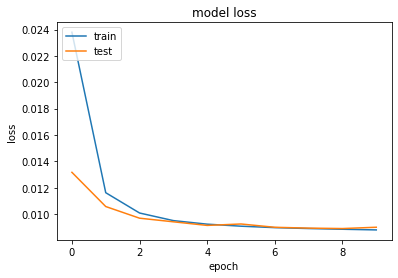

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can see that after the 5th epoch, there's no significant progress in loss. Visualizing like this can help you get a better idea of how many epochs is really enough to train your model. In this case, there's simply no need to train it for 10 epochs, and most of the training is redundant.

This can also lead to over-fitting the model, which will make it perform poorly on new data outside the training and testing datasets.

In [17]:
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

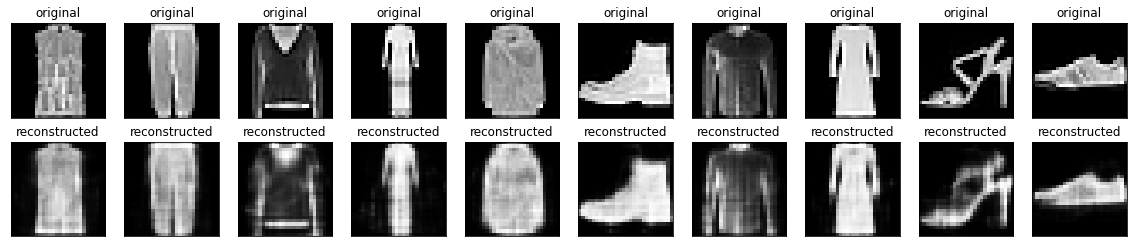

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(x_test[select_img_index])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[select_img_index])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


You can see that the results are not really good. However, if we take into consideration that the whole image is encoded in the extremely small vector of 64 seen in the middle, this isn't bad at all. Through the compression to just 64 we lose a lot of data.

# Anomaly Detection

### Train an autoencoder to detect anomalies using the ECG5000 dataset:

- Plot and observe a normal ECG vs an anomalous ECG.
- Design and Train  an  autoencoder  on  the  normal  rhythms  only,  then  use  it  to reconstruct all the data.
- The autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.
- Classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. 

In [21]:
# Download the dataset
import pandas as pd
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
print(dataframe.shape)
dataframe.head()

(4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Do train-test split

In [22]:
from sklearn.model_selection import train_test_split
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Do min max scaling

In [23]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Convert labels to suitable format. And get train data, normal data and anomalous data

In [24]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

train_data, normal_test_data, anomalous_train_data

(<tf.Tensor: shape=(3998, 140), dtype=float32, numpy=
 array([[0.57030463, 0.46561658, 0.29058117, ..., 0.48504233, 0.4233502 ,
         0.47598344],
        [0.48320588, 0.28246963, 0.16471253, ..., 0.567567  , 0.4677294 ,
         0.2692329 ],
        [0.48144642, 0.35151404, 0.25972766, ..., 0.5479421 , 0.5077544 ,
         0.54298663],
        ...,
        [0.41039047, 0.24164985, 0.13120876, ..., 0.5277313 , 0.5654091 ,
         0.5023885 ],
        [0.5397748 , 0.4140786 , 0.28101394, ..., 0.51266515, 0.43706053,
         0.4426865 ],
        [0.29639772, 0.15988176, 0.18883787, ..., 0.53766966, 0.545786  ,
         0.40826708]], dtype=float32)>,
 <tf.Tensor: shape=(560, 140), dtype=float32, numpy=
 array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
         0.3713729 ],
        [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
         0.49527124],
        [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
         0.4754273 ]

Visualize all the types of data - normal and anomalous to see visible differences if any

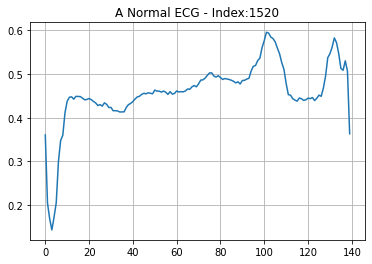

In [25]:
plt.grid()
selected_index = np.random.randint(normal_train_data.shape[0])
plt.plot(np.arange(140), normal_train_data[selected_index])
plt.title(f"A Normal ECG - Index:{selected_index}")
plt.show()

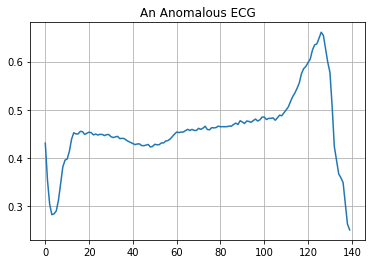

In [26]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

Make autoencoder thats trained on normal data only, it'll recreate the ecg and classify it as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples.

In [29]:

def build_autoencoder():
  # Encoder Network
  encoder = tf.keras.Sequential()
  encoder.add(Dense(32, activation="relu"))
  encoder.add(Dense(16, activation="relu"))
  encoder.add(Dense(8, activation="relu"))
  # Decoder Network
  decoder = tf.keras.Sequential()
  decoder.add(Dense(16, activation="relu"))
  decoder.add(Dense(32, activation="relu"))
  decoder.add(Dense(140, activation="sigmoid"))
  return encoder,decoder

# Get encoder and Decoder
encoder, decoder = build_autoencoder()
# Use Functional API to link them together
inp = Input((normal_train_data.shape[1:]))
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = tf.keras.Model(inp,reconstruction)


# autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')
history2 = autoencoder.fit(normal_train_data,
                          normal_train_data,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data, test_data),
                          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 66ms/step - loss: 0.0582 - val_loss: 0.0534
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0564 - val_loss: 0.0520
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0543 - val_loss: 0.0501
Epoch 4/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0511 - val_loss: 0.0481
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0468 - val_loss: 0.0466
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0426 - val_loss: 0.0451
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0386 - val_loss: 0.0426
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0351 - val_loss: 0.0410
Epoch 9/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0323 - val_loss: 0.0402
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0302 - val_loss: 0.0389
Epoch 11/20
5/5 [=================

We plot the loss and val loss plots

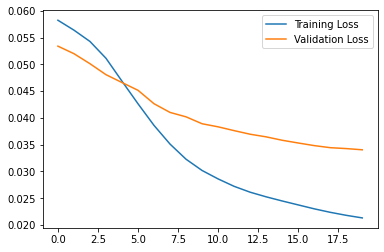

In [30]:
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.legend()

We observe the differences between input ecg and reconstructed ecg.

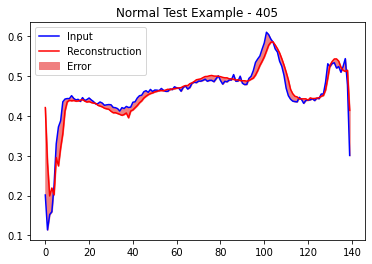

In [32]:
encoded_data =encoder(normal_test_data).numpy()
decoded_data = decoder(encoded_data).numpy()

selected_index = np.random.randint(normal_test_data.shape[0])

plt.plot(normal_test_data[selected_index], 'b')
plt.plot(decoded_data[selected_index], 'r')
plt.title(f'Normal Test Example - {selected_index}')
plt.fill_between(np.arange(140), decoded_data[selected_index], normal_test_data[selected_index], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

For normal ecg input, we observe that the reconstructed ecg is very close to the input.

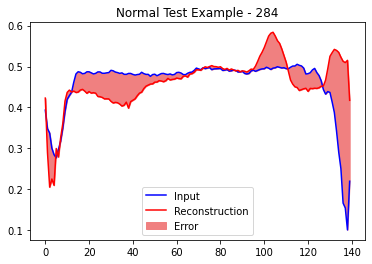

In [34]:
encoded_data =encoder(anomalous_test_data).numpy()
decoded_data =decoder(encoded_data).numpy()

selected_index = np.random.randint(anomalous_test_data.shape[0])

plt.plot(anomalous_test_data[selected_index], 'b')
plt.plot(decoded_data[selected_index], 'r')
plt.title(f'Normal Test Example - {selected_index}')
plt.fill_between(np.arange(140), decoded_data[selected_index], anomalous_test_data[selected_index], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

For anomlous input we observe massive differences between input and reconstruction therefore we classify it as anomalous.

74/74 [==============================] - 0s 2ms/step


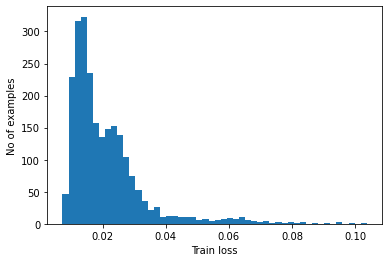

In [35]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

We decide the threshold vaklue for classification. That is 1 std deviation away.

In [36]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033415224


14/14 [==============================] - 0s 2ms/step


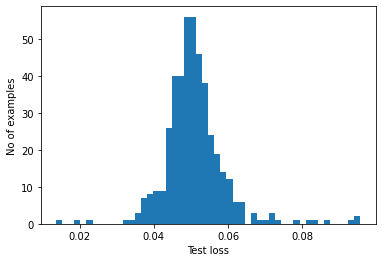

In [40]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Output the model metrics.

In [38]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))
    
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.9921875
Recall = 0.9071428571428571
